In [8]:
from mt.featurize_repo import tree_to_graph, parser, tree_sitter

import networkx as nx
import matplotlib.pyplot as plt
from uuid6 import uuid7

In [2]:
code = b"""
def f(a: int, b: float) -> int:
    return (10 / a) * b

if __name__ == "__main__":
    print(f"{f(1, 3)} is the answer")
"""

ast = parser.parse(code)
ast

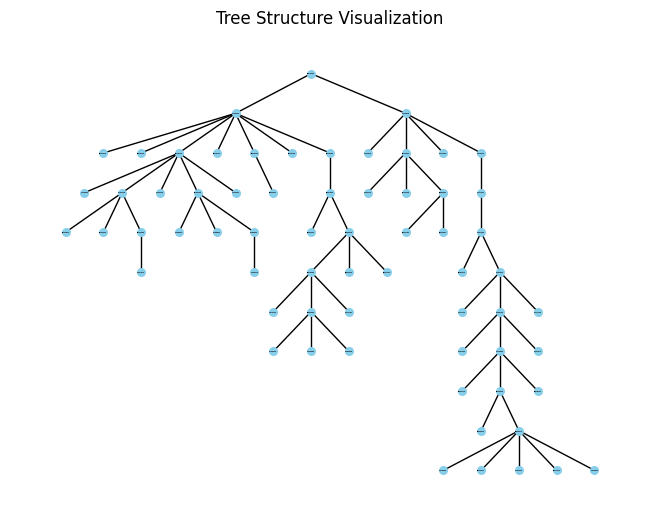

In [3]:
G = tree_to_graph(ast.root_node, True)

pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, arrows=False, node_size=30, node_color='skyblue', font_size=1, font_weight='bold')

plt.title('Tree Structure Visualization')
plt.show()

In [22]:
def tree_to_graph(root: tree_sitter.Node, with_anon: bool = False) -> nx.DiGraph:
    G = nx.DiGraph()
    todo = [(root, uuid7().hex)]
    while todo:
        node, new_id = todo.pop()
        if with_anon or node.is_named:
            start_line, start_col = node.start_point
            end_line, end_col = node.end_point

            G.add_node(
                new_id,
                type=node.type,
                start_line=start_line + 1,
                end_line=end_line + 1,
                start_col=start_col,
                end_col=end_col,
            )
        for child in node.children:
            if with_anon or child.is_named:
                child_id = uuid7().hex
                G.add_edge(new_id, child_id)
            todo.append((child, child_id))
    return G

In [23]:
G = tree_to_graph(ast.root_node)

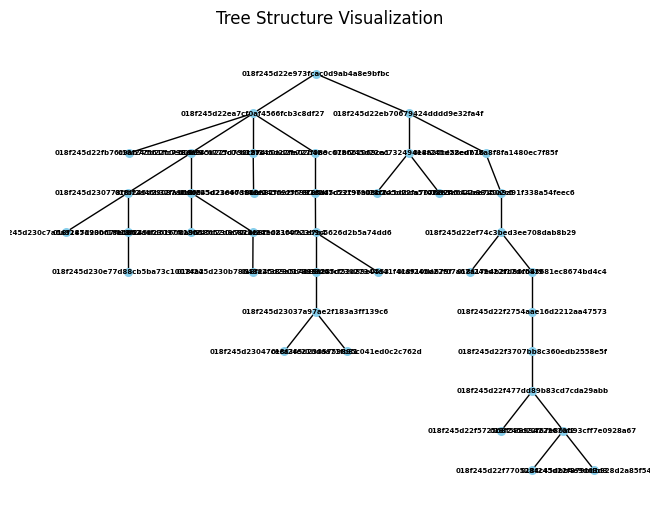

In [25]:
pos = nx.drawing.nx_agraph.graphviz_layout(G, prog="dot")
nx.draw(G, pos, with_labels=True, arrows=False, node_size=30, node_color='skyblue', font_size=5, font_weight='bold')

plt.title('Tree Structure Visualization')
plt.show()